### Centroid comparison   
 - CONUS-WTs_existing_centroids.npz I used  <br> 
 - PCACA12_PSL-UV700-TWC-CONUS-ERAint-1979-2014_centroids.nc from Andy's ERA-INTERIM (TEST-AssigmentERA-Int.py)

In [1]:
from netCDF4 import Dataset
from pdb import set_trace as stop
import numpy as np
import xarray as xr
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cmap_s ='seismic'

rgrCentroids_nc#### Original centroid I used: CONUS-WTs_existing_centroids.npz

['rgrLonWT', 'rgrCentroids', 'rgrSTDDEVCentroids', 'rgrLatWT']


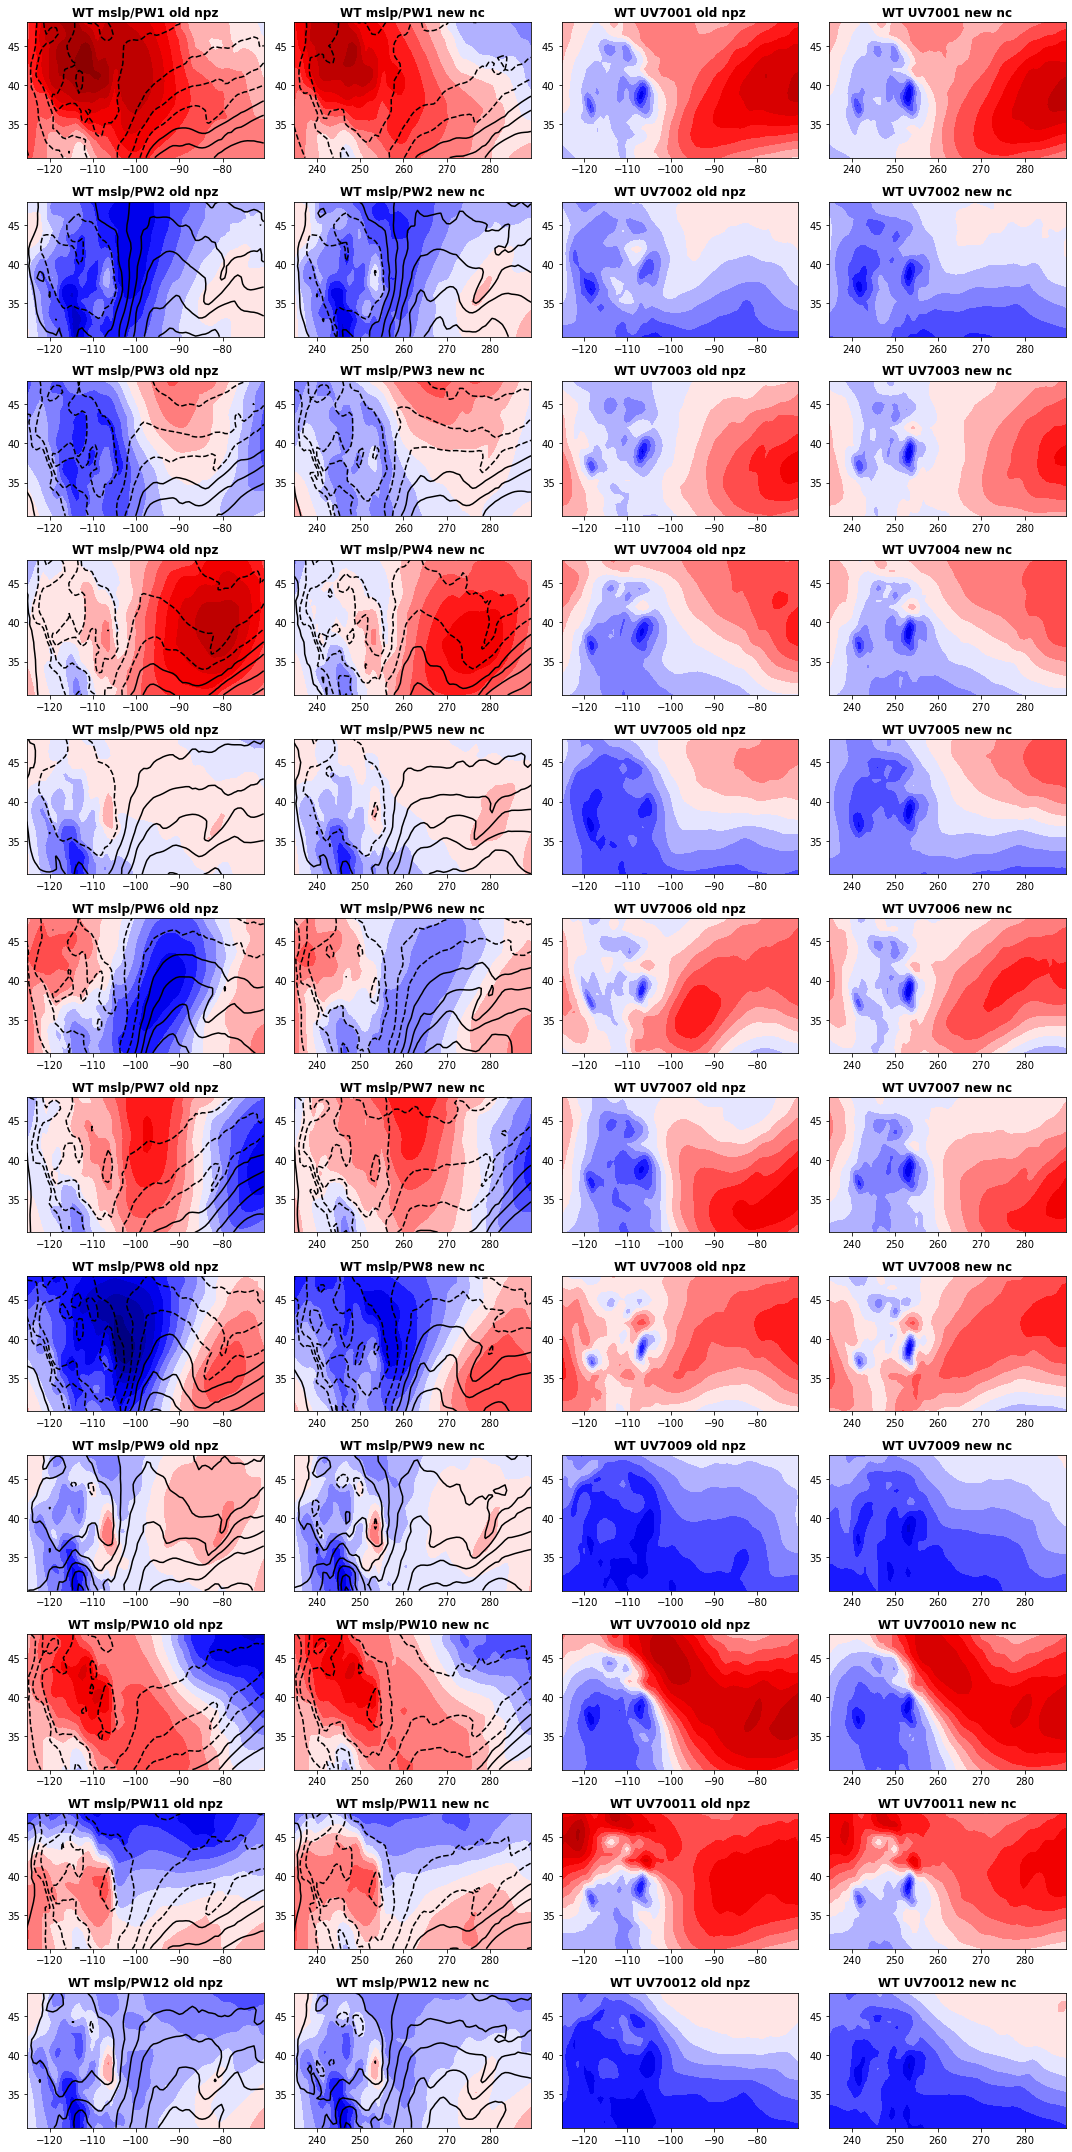

In [12]:
#  read in the existing centroids
sCentroids='/glade/u/home/mingge/WTing_existing-centroids/CONUS-WTs_existing_centroids.npz'
DATA=np.load(sCentroids)
rgrCentroids=DATA['rgrCentroids']               # (12, 3, 24, 74)
     
n_wt = rgrCentroids.shape[0]

#Veiew.npz file  
print(DATA.files)  # ['rgrLonWT', 'rgrCentroids', 'rgrSTDDEVCentroids', 'rgrLatWT']
rgrLatWT=DATA['rgrLatWT']  # [-125.25, ..., -70.5]
rgrLonWT=DATA['rgrLonWT']  # [48, ..., 30.75]


Centroids='/glade/u/home/prein/papers/DNV-WT-Eval/data/WT-Data/PCACA12_PSL-UV700-TWC-CONUS-ERAint-1979-2014_centroids.nc'
ncid = Dataset(Centroids)
rgrCentroids_nc=ncid.variables['centroids']
rgrLatWT_nc=np.squeeze(ncid.variables['lat'][:])
rgrLonWT_nc=np.squeeze(ncid.variables['lon'][:])

fig, axs = plt.subplots(12, 4, figsize=(15,30))
 
ct = 0
levels = np.linspace(-2,2,21) 
for nr in range(n_wt):
    msl   =axs[nr,0].contourf(rgrLonWT,    rgrLatWT,    rgrCentroids[ct,0],    levels=levels, cmap=cmap_s)
    pw    =axs[nr,0].contour (rgrLonWT,    rgrLatWT,    rgrCentroids[ct,2],    colors='k')
    msl_nc=axs[nr,1].contourf(rgrLonWT_nc, rgrLatWT_nc, rgrCentroids_nc[ct,1], levels=levels, cmap=cmap_s) 
    pw_nc =axs[nr,1].contour (rgrLonWT_nc, rgrLatWT_nc, rgrCentroids_nc[ct,2], colors='k') 
    uv    =axs[nr,2].contourf(rgrLonWT,    rgrLatWT,    rgrCentroids[ct,1],    levels=levels, cmap=cmap_s)
    uv_nc =axs[nr,3].contourf(rgrLonWT_nc, rgrLatWT_nc, rgrCentroids_nc[ct,0], levels=levels, cmap=cmap_s) 
    ct = nr + 1
    axs[nr,0].set_title("WT mslp/PW" + str(ct) + " old npz", fontweight='bold')
    axs[nr,1].set_title("WT mslp/PW" + str(ct) + " new nc" , fontweight='bold') 
    axs[nr,2].set_title("WT UV700"   + str(ct) + " old npz", fontweight='bold')
    axs[nr,3].set_title("WT UV700"   + str(ct) + " new nc", fontweight='bold') 
plt.tight_layout()

#### stop

#### plot seperately

['rgrLonWT', 'rgrCentroids', 'rgrSTDDEVCentroids', 'rgrLatWT']


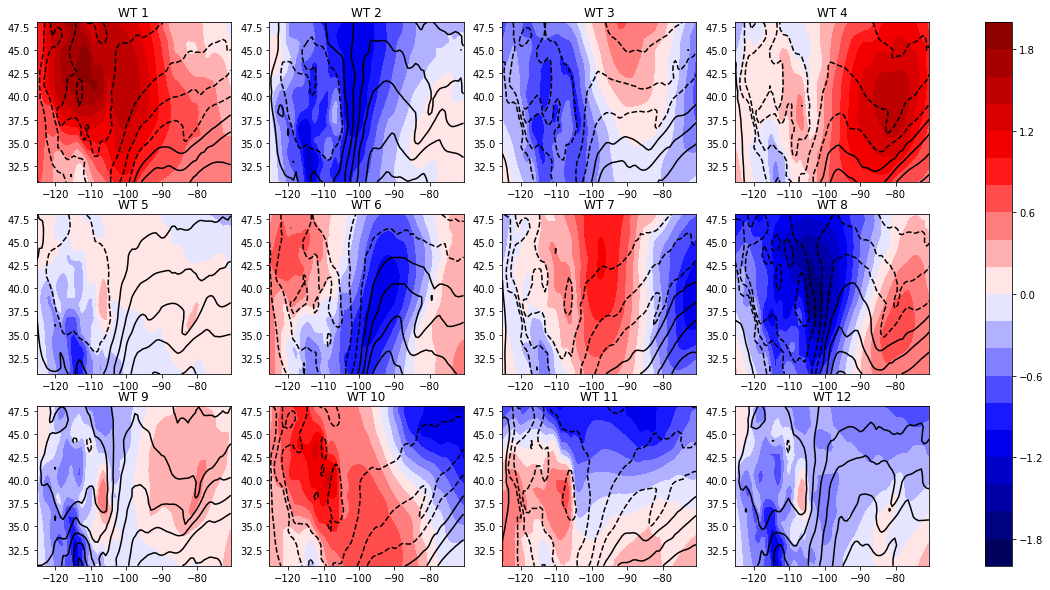

In [10]:
#  read in the existing centroids
sCentroids='/glade/u/home/mingge/WTing_existing-centroids/CONUS-WTs_existing_centroids.npz'
DATA=np.load(sCentroids)
rgrCentroids=DATA['rgrCentroids']               # (12, 3, 24, 74)
rgiWTs=range(1, rgrCentroids.shape[0]+1, 1)     # number of WT 

n_wt = rgrCentroids.shape[0]
n_var = rgrCentroids.shape[1]
n_lat = rgrCentroids.shape[2]
n_lon = rgrCentroids.shape[3]

#Veiew.npz file  
print(DATA.files)  # ['rgrLonWT', 'rgrCentroids', 'rgrSTDDEVCentroids', 'rgrLatWT']
rgrLatWT=DATA['rgrLatWT']  # [-125.25, ..., -70.5]
rgrLonWT=DATA['rgrLonWT']  # [48, ..., 30.75]

fig, axs = plt.subplots(3, 4, figsize=(20,10))
 
ct = 0
levels = np.linspace(-2,2,21)
 
for nr in range(0,3):
    for nc in range(0,4):
        msl=axs[nr,nc].contourf(rgrLonWT, rgrLatWT, rgrCentroids[ct,0], levels=levels, cmap=cmap_s)
        pw =axs[nr,nc].contour(rgrLonWT, rgrLatWT, rgrCentroids[ct,2],colors='k')
        
        ct +=1
        axs[nr,nc].title.set_text("WT " + str(ct))
        
fig.colorbar(msl, ax=axs.ravel().tolist()) 

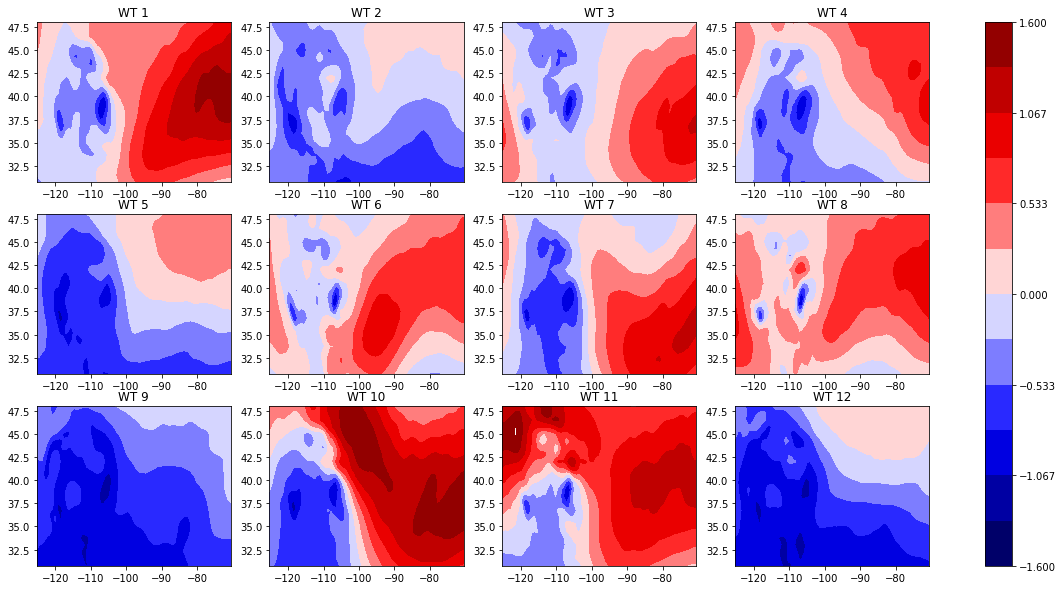

In [11]:
fig, axs = plt.subplots(3, 4, figsize=(20,10))
 
ct = 0
levels = np.linspace(-1.6, 1.6, 13)
 
for nr in range(0,3):
    for nc in range(0,4):
        msl=axs[nr,nc].contourf(rgrLonWT, rgrLatWT, rgrCentroids[ct,1], levels=levels, cmap=cmap_s)
        ct +=1
        axs[nr,nc].title.set_text("WT " + str(ct))
        
fig.colorbar(msl, ax=axs.ravel().tolist()) 

#### Andy's comparison centroid

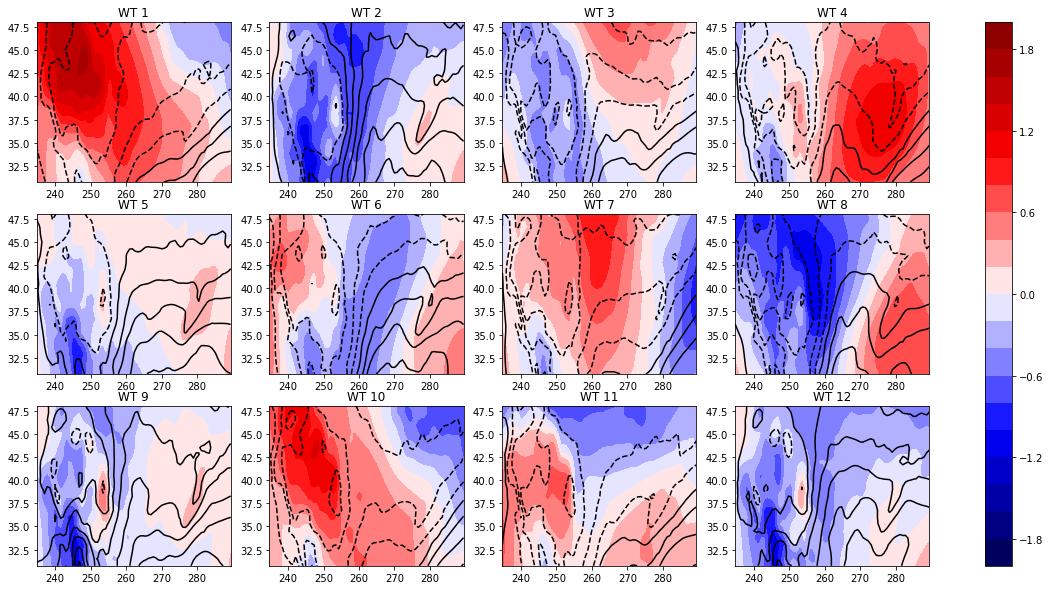

In [12]:
Centroids='/glade/u/home/prein/papers/DNV-WT-Eval/data/WT-Data/PCACA12_PSL-UV700-TWC-CONUS-ERAint-1979-2014_centroids.nc'
ncid = Dataset(Centroids)
rgrCentroids=ncid.variables['centroids']  # (12, 3, 24, 74)   
n_wt  = rgrCentroids.shape[0]
n_var = rgrCentroids.shape[1]
n_lat = rgrCentroids.shape[2]
n_lon = rgrCentroids.shape[3]

rgiWTs=range(1, rgrCentroids.shape[0]+1, 1)     # number of WT  

rgrLatWT=np.squeeze(ncid.variables['lat'][:])
rgrLonWT=np.squeeze(ncid.variables['lon'][:])

fig, axs = plt.subplots(3, 4, figsize=(20,10))
 
ct = 0
levels = np.linspace(-2,2,21)

for nr in range(0,3):
    for nc in range(0,4):
        msl=axs[nr,nc].contourf(rgrLonWT, rgrLatWT, rgrCentroids[ct,1], levels=levels, cmap=cmap_s)
        pw =axs[nr,nc].contour(rgrLonWT, rgrLatWT, rgrCentroids[ct,2],colors='k')
        
        ct +=1
        axs[nr,nc].title.set_text("WT " + str(ct))
        
fig.colorbar(msl, ax=axs.ravel().tolist()) 


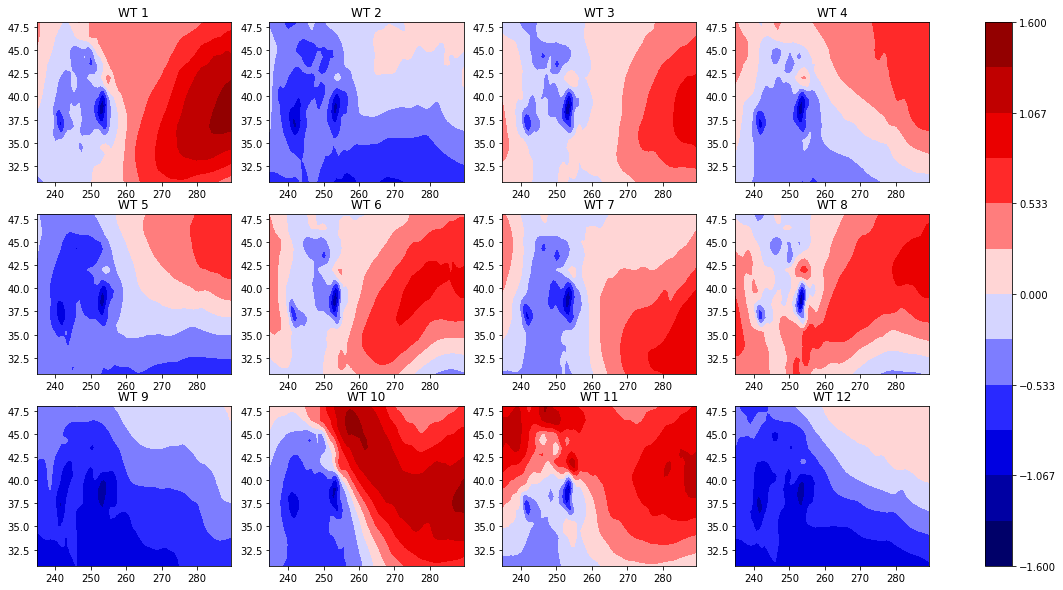

In [14]:
fig, axs = plt.subplots(3, 4, figsize=(20,10))
 
ct = 0
levels = np.linspace(-1.6, 1.6, 13)
for nr in range(0,3):
    for nc in range(0,4):
        msl=axs[nr,nc].contourf(rgrLonWT, rgrLatWT, rgrCentroids[ct,0], levels=levels, cmap=cmap_s)
         
        ct +=1
        axs[nr,nc].title.set_text("WT " + str(ct))
        
fig.colorbar(msl, ax=axs.ravel().tolist()) 